In [90]:
from apposto.utils.footprint_geometry import FootprintGeometry
from apposto.utils.zernike_projection_on_subaperture import ZernikeProjectionOnSubaperture
import numpy as np
import matplotlib as mpl

In [91]:
fg = FootprintGeometry()

z1 = 0
z2 = 10e3
r_tele = 10
zenith_angle = 0
fov = 50
th_target = 0
az_target = 0
th_ngs1 = 40
az_ngs1 = 60
th_ngs2 = -30
az_ngs2 = 0

fg.setLayerAltitude(z1)
fg.setTelescopeRadiusInMeter(r_tele)
fg.set_zenith_angle(zenith_angle)
fg.setInstrumentFoV(fov)
fg.addLgs(0,0,0,0)
fg.addNgs(th_ngs1, az_ngs1)
fg.addNgs(th_ngs2, az_ngs2)
fg.addTarget(th_target, az_target)

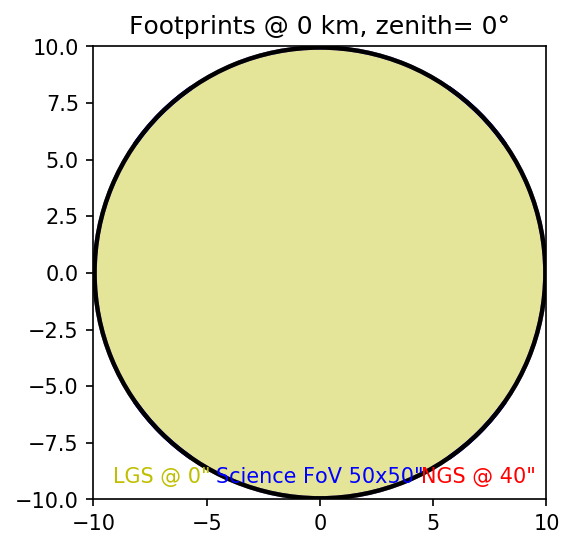

LGS (x,y,r): 0.000000, 0.000000 - 10.000000
NGS (x,y,r): 0.000000, 0.000000 - 10.000000
NGS (x,y,r): -0.000000, -0.000000 - 10.000000
Targets (x,y,r): 0.000000, 0.000000 - 10.000000
Science (x,y,r): 0.000000, 0.000000 - 10.000000
Science (x,y,r): -0.000000, 0.000000 - 10.000000
Science (x,y,r): -0.000000, -0.000000 - 10.000000
Science (x,y,r): 0.000000, -0.000000 - 10.000000
Metapupil (x,y,r): 0.000000, 0.000000 - 10.000000


In [93]:
fg.compute()
mpl.rcParams['figure.dpi'] = 150
fg.plot()
fg.report()

In [94]:
R_ground = fg._metapupilL[0][2]
h_ground_target = np.sqrt(fg._targetsL[0][0]**2 + fg._targetsL[0][1])
az_ground_target = np.arctan2(fg._targetsL[0][1], fg._targetsL[0][0])

zp_ground_on = ZernikeProjectionOnSubaperture(pupilRadiusInMeter=R_ground,
                                              subapsRadiusInMeter=r_tele,
                                              subapOffAxisRadiusInMeter=h_ground_target,
                                              subapOffAxisAzimuthInDegrees=az_ground_target)
pDM_ground_on = zp_ground_on.getProjectionMatrix()[:2,:2]
pDM_ground_on

array([[1., 0.],
       [0., 1.]])

In [95]:
h_ground_ngs1 = np.sqrt(fg._ngsL[0][0]**2 + fg._ngsL[0][1])
az_ground_ngs1 = np.arctan2(fg._ngsL[0][1], fg._ngsL[0][0])

zp_ground_off_1 = ZernikeProjectionOnSubaperture(pupilRadiusInMeter=R_ground,
                                                  subapsRadiusInMeter=r_tele,
                                                  subapOffAxisRadiusInMeter=h_ground_ngs1,
                                                  subapOffAxisAzimuthInDegrees=az_ground_ngs1)
pDM_ground_off_1 = zp_ground_off_1.getProjectionMatrix()[:2,:2]
pDM_ground_off_1

array([[1., 0.],
       [0., 1.]])

In [96]:
h_ground_ngs2 = np.sqrt(fg._ngsL[1][0]**2 + fg._ngsL[1][1])
az_ground_ngs2 = np.arctan2(fg._ngsL[1][1], fg._ngsL[1][0])

zp_ground_off_2 = ZernikeProjectionOnSubaperture(pupilRadiusInMeter=R_ground,
                                                  subapsRadiusInMeter=r_tele,
                                                  subapOffAxisRadiusInMeter=h_ground_ngs2,
                                                  subapOffAxisAzimuthInDegrees=az_ground_ngs2)
pDM_ground_off_2 = zp_ground_off_2.getProjectionMatrix()[:2,:2]
pDM_ground_off_2

array([[1., 0.],
       [0., 1.]])

In [97]:
pDM_ground_off = np.vstack((pDM_ground_off_1, pDM_ground_off_2))
pDM_ground_off

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.]])

<Figure size 900x600 with 0 Axes>

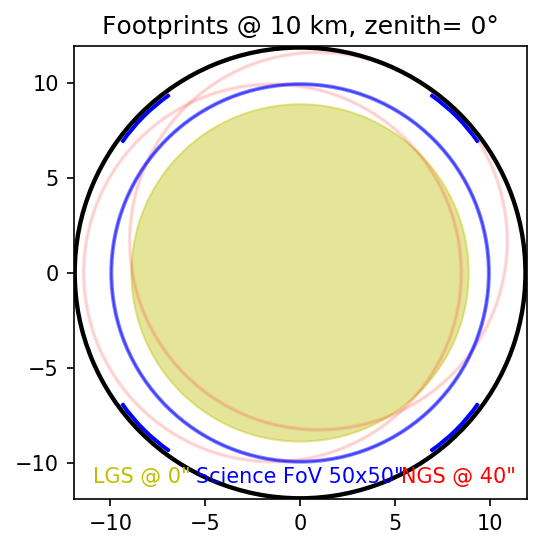

LGS (x,y,r): 0.000000, 0.000000 - 8.888889
NGS (x,y,r): 0.969600, 1.679396 - 10.000000
NGS (x,y,r): -1.454400, -0.000000 - 10.000000
Targets (x,y,r): 0.000000, 0.000000 - 10.000000
Science (x,y,r): 1.212000, 1.212000 - 10.000000
Science (x,y,r): -1.212000, 1.212000 - 10.000000
Science (x,y,r): -1.212000, -1.212000 - 10.000000
Science (x,y,r): 1.212000, -1.212000 - 10.000000
Metapupil (x,y,r): 0.000000, 0.000000 - 11.939200


In [98]:
fg.setLayerAltitude(z2)
fg.compute()
plt.figure()
fg.plot()
fg.report()

In [99]:
R_layer2 = fg._metapupilL[0][2]
h_layer2_target = np.sqrt(fg._targetsL[0][0]**2 + fg._targetsL[0][1])
az_layer2_target = np.arctan2(fg._targetsL[0][1], fg._targetsL[0][0])
print(h_layer2_target)

zp_on = ZernikeProjectionOnSubaperture(pupilRadiusInMeter=R,
                                        subapsRadiusInMeter=r_tele,
                                        subapOffAxisRadiusInMeter=h_layer2_target,
                                        subapOffAxisAzimuthInDegrees=az_layer2_target)
pDM_layer2_on = zp_on.getProjectionMatrix()[:2,:3]
pDM_layer2_on

0.0


array([[0.87302696, 0.        , 0.        ],
       [0.        , 0.87302696, 0.        ]])

In [100]:
h_layer2_ngs1 = np.sqrt(fg._ngsL[0][0]**2 + fg._ngsL[0][1])
az_layer2_ngs1 = np.arctan2(fg._ngsL[0][1], fg._ngsL[0][0])
print(h_layer2_ngs1)
print(az_layer2_ngs1)

zp_layer2_off_1 = ZernikeProjectionOnSubaperture(pupilRadiusInMeter=R_layer2,
                                                  subapsRadiusInMeter=r_tele,
                                                  subapOffAxisRadiusInMeter=h_layer2_ngs1,
                                                  subapOffAxisAzimuthInDegrees=az_layer2_ngs1)
pDM_layer2_off_1 = zp_layer2_off_1.getProjectionMatrix()[:2,:3]
pDM_layer2_off_1

1.618493318805729
1.0471975511965976


array([[0.83757706, 0.        , 0.        ],
       [0.        , 0.83757706, 0.        ]])

In [78]:
h_layer2_ngs2 = np.sqrt(fg._ngsL[1][0]**2 + fg._ngsL[1][1])
az_layer2_ngs2 = np.arctan2(fg._ngsL[1][1], fg._ngsL[1][0])

zp_layer2_off_2 = ZernikeProjectionOnSubaperture(pupilRadiusInMeter=R_layer2,
                                                  subapsRadiusInMeter=r_tele,
                                                  subapOffAxisRadiusInMeter=h_layer2_ngs2,
                                                  subapOffAxisAzimuthInDegrees=az_layer2_ngs2)
pDM_layer2_off_2 = zp_layer2_off_2.getProjectionMatrix()[:2,:3]
pDM_layer2_off_2

array([[0.83757706, 0.        , 0.        ],
       [0.        , 0.83757706, 0.        ]])